In [1]:
import string
import warnings
import numpy as np
import pandas as pd
from rdkit import Chem
import matplotlib.pyplot as plt
from rdkit.Chem import Lipinski, Descriptors
from matplotlib.pyplot import MultipleLocator

warnings.filterwarnings("ignore")

In [2]:
# https://stackoverflow.com/questions/12444716/how-do-i-set-the-figure-title-and-axes-labels-font-size-in-matplotlib
# plt.style.use(["science", "nature", "no-latex"])

font_size_big = 12
font_size_small = 10
plt.rcParams.update(
    {
        "font.family": "serif",  # specify font family here
        "font.serif": ["Times New Roman"],  # specify font here
        "font.size": font_size_small,  # specify font size here
        "axes.labelsize": font_size_big,
        "axes.titlesize": font_size_small,
        "xtick.labelsize": font_size_small,
        "ytick.labelsize": font_size_small,
        "legend.fontsize": font_size_big,
        "legend.title_fontsize": font_size_big,
    }
)

In [3]:
data = pd.read_excel(r"6_after_removing_outliers.xlsx")
print(data.shape)
data.head()

(2440, 14)


,chemical_name,cas_number,VDss_L_kg,SD,fu_h,reference_number,Comments_1,Comments_2,t 1/2,smiles,Inchi,MW,LOGP,logVDss
0,5-Hydroxymethyl tolterodine,207679-81-0,2.41,NaN,NaN,R1,PDR reference on fesoterodine. Accessed July 1...,"After oral administration, fesoterodine is wel...",NaN,CC(C)N(CCC(c1ccccc1)c1cc(CO)ccc1O)C(C)C,InChI=1S/C22H31NO2/c1-16(2)23(17(3)4)13-12-20(...,341.495,4.52530,0.382017
1,Aclidinium bromide,320345-99-1,4.30,NaN,NaN,R1,PDR. Accessed August 07 2014. http://www.pdr3d...,Assumed 70 kg as average weight. t1/2 iv not r...,NaN,O=C(OC1C[N+]2(CCCOc3ccccc3)CCC1CC2)C(O)(c1cccs...,"InChI=1S/C26H30NO4S2/c28-25(26(29,23-9-4-17-32...",484.663,4.66680,0.633468
2,Ajmaline,4360-12-7,4.00,NaN,NaN,R1,"Roberto Padrini, Donatella Piovan, Antonio J...","Rauwolfine. N=10, average dose 67.4 mg, MRT fr...",NaN,CC[C@H]1C2C[C@H]3[C@@H]4N(C)c5ccccc5[C@]45C[C@...,InChI=1S/C20H26N2O2/c1-3-10-11-8-14-17-20(12-6...,326.440,1.55450,0.602060
3,Alcuronium,23214-96-2,0.32,NaN,NaN,R1,"Walker J, Shanks CA, and Triggs EJ (1980) Cli...",NaN,NaN,C=CC[N+]12CCC34c5ccccc5N5/C=C6/C7CC8C9(CC[N+]8...,InChI=1S/C44H50N4O2/c1-3-17-47-19-15-43-35-9-5...,666.910,5.47560,-0.494850
4,Almokalant,123955-10-2,1.80,NaN,NaN,R1,Electropharmacologic effects and pharmacokinet...,Intravenous infusion (10') of 4.5 mg. N=10. Da...,NaN,CCCS(=O)CCCN(CC)CC(O)COc1ccc(C#N)cc1,InChI=1S/C18H28N2O3S/c1-3-11-24(22)12-5-10-20(...,352.500,2.16868,0.255273


In [4]:
def descriptor(df):
    """This function adds hydrogen bond donor, hydrogen bond acceptor, 
    number of rotatable bonds and topological polar surface area information to excel file.
    """
    for smiles, r in zip(df["smiles"], range(df.shape[0])):
        # noinspection PyBroadException
        try:
            mol = Chem.MolFromSmiles(smiles)
            # hydrogen bond donor
            data.loc[r, 'hbd'] = Lipinski.NumHDonors(mol)
            # hydrogen bond acceptor
            data.loc[r, 'hba'] = Lipinski.NumHAcceptors(mol)
            # number of rotatable bonds
            data.loc[r, 'rb'] = Lipinski.NumRotatableBonds(mol)
            # topological polar surface area
            data.loc[r, 'TPSA'] = Descriptors.TPSA(mol)
        except:
            # delete error data
            df.drop(i, axis=0, inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

In [5]:
def data_split(column, num1, num2, num3, num4, num5):
    """This function divides the data and counts the data in each range."""
    data_name = param[column]
    data_name1 = data_name[data_name <= num1]
    data_name2 = data_name[(data_name <= num2) & (data_name > num1)]
    data_name3 = data_name[(data_name <= num3) & (data_name > num2)]
    data_name4 = data_name[(data_name <= num4) & (data_name > num3)]
    data_name5 = data_name[(data_name <= num5) & (data_name > num4)]
    data_name6 = data_name[data_name > num5]
    counts = [len(data_name1), len(data_name2), len(data_name3), len(data_name4), len(data_name5), len(data_name6)]
    return counts

In [6]:
# adds hydrogen bond donor, hydrogen bond acceptor,
# number of rotatable bonds and topological polar surface area information
data = descriptor(data)

In [7]:
# filter out the columns
param_list = ['VDss_L_kg', 'logVDss', 'MW', 'LOGP', 'hbd', 'hba', 'rb', 'TPSA']
param = data[param_list]

In [8]:
# generate descriptive statistics
param.describe()

,VDss_L_kg,logVDss,MW,LOGP,hbd,hba,rb,TPSA
count,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000
mean,3.140481,0.025269,376.331303,2.126787,2.258607,5.490984,5.225000,93.526631
std,6.463989,0.623870,120.818659,2.031515,1.640735,2.832469,3.252997,50.174420
min,0.040000,-1.397940,113.116000,-3.378800,0.000000,0.000000,0.000000,0.000000
25%,0.320000,-0.494850,287.359000,0.702900,1.000000,3.000000,3.000000,57.530000
50%,1.000000,0.000000,366.339000,2.269300,2.000000,5.000000,5.000000,86.990000
75%,2.800000,0.447158,453.458000,3.600600,3.000000,7.000000,7.000000,118.865000
max,60.000000,1.778151,690.860000,7.451600,10.000000,16.000000,23.000000,299.380000


In [9]:
"""define data split points"""
count_name1 = ['<=0.1', '0.1-0.7', '0.7-1.5', '1.5-2.5', '2.5-10', '>10']
count_name2 = ['<=-1', '-1-0', '0-0.3', '0.3-0.6', '0.6-1', '>1']
count_name3 = ['<=200', '200-300', '300-400', '400-500', '500-600', '>600']
count_name4 = ['<=0', '0-0.5', '0.5-1.5', '1.5-2.5', '2.5-3.5', '>3.5']
count_name5 = ['<=1', '1-2', '2-3', '3-5', '5-7', '>7']
count_name6 = ['<=1', '1-3', '3-5', '5-7', '7-10', '>10']
count_name7 = ['<=1', '1-3', '3-5', '5-7', '7-10', '>10']
count_name8 = ['<=50', '50-75', '75-100', '100-150', '150-200', '>200']

In [10]:
"""count the number of data corresponding to each range"""
count1 = data_split('VDss_L_kg', 0.1, 0.7, 1.5, 2.5, 10)
count2 = data_split('logVDss', -1, 0, 0.3, 0.6, 1)
count3 = data_split('MW', 200, 300, 400, 500, 600)
count4 = data_split('LOGP', 0, 0.5, 1.5, 2.5, 3.5)
count5 = data_split('hbd', 1, 2, 3, 5, 7)
count6 = data_split('hba', 1, 3, 5, 7, 10)
count7 = data_split('rb', 1, 3, 5, 7, 10)
count8 = data_split('TPSA', 50, 75, 100, 150, 200)

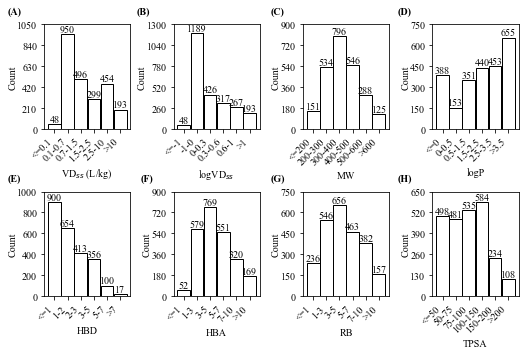

In [11]:
"""draw bar charts"""
plt.figure(figsize=(8.5, 5))
# parameter assignment
font = {'family': 'Times New Roman',
        'size': 10}
labelsize = 10
fontsize = 10
y_coordinate = 1.1
wspace = 0.5
hspace = 0.6

label_list = ['VD$_{ss}$ (L/kg)', 'logVD$_{ss}$', 'MW', 'logP', 'HBD', 'HBA', 'RB', 'TPSA']
ylim_list = [1050, 1300, 900, 750, 1000, 900, 750, 650]
count_name = [count_name1, count_name2, count_name3, count_name4, count_name5, count_name6, count_name7, count_name8]
count_list = [count1, count2, count3, count4, count5, count6, count7, count8]
x_coordinate_list = [-0.42, -0.43, -0.38, -0.4, -0.42, -0.38, -0.38, -0.4]
number_list = ['(A)', '(B)', '(C)', '(D)', '(E)', '(F)', '(G)', '(H)']

for i, name, count, xlabel, number, x_coordinate, lim, in zip(range(1, 9), count_name, count_list, label_list,
                                                              number_list, x_coordinate_list, ylim_list):
    axi = plt.subplot(2, 4, i)
    pi = axi.bar(name, count, width=0.97, color='0.25', fill=False)
    y_gap = MultipleLocator(lim/5)
    ax = plt.gca()
    ax.yaxis.set_major_locator(y_gap)
    # set the x-axis tick labels
    axi.set_xticklabels(name, rotation=45, horizontalalignment='right')
    # set the labels and font size of the x and y axes
    axi.set_ylabel('Count', font, loc='center', labelpad=0)
    axi.set_xlabel(xlabel, font)
    # set tick label font size
    plt.tick_params(labelsize=labelsize)
    # set the font of the x-axis and y-axis tick values
    labels = axi.get_xticklabels() + axi.get_yticklabels()
    [label.set_fontname('Times New Roman') for label in labels]
    # display values above the column chart
    axi.bar_label(pi, fontsize=fontsize, family='Times New Roman')
    # add numbers to figures
    axi.text(x_coordinate, y_coordinate, number, transform=axi.transAxes, size=10, family='Times New Roman',
             weight='bold')
    # set the range of y
    axi.set_ylim(0, lim)
# set the spacing between graphs
plt.subplots_adjust(wspace=wspace, hspace=hspace)
plt.savefig("fig3.tiff", dpi=300, bbox_inches='tight')
plt.show()

In [12]:
"""the number of VDss in a certain range as a percentage of the total number"""
VDss_table = pd.DataFrame(index=count_name1, columns=['Count', '%'])
for i, value in zip(count_name1, count1):
    VDss_table.loc[i, 'Count'] = value
    VDss_table.loc[i, '%'] = round((value / 2440) * 100)

VDss_table

,Count,%
<=0.1,48,2
0.1-0.7,950,39
0.7-1.5,496,20
1.5-2.5,299,12
2.5-10,454,19
>10,193,8


In [13]:
# details of VDss minimum value
data[data['VDss_L_kg'] == min(data['VDss_L_kg'])]

,chemical_name,cas_number,VDss_L_kg,SD,fu_h,reference_number,Comments_1,Comments_2,t 1/2,smiles,Inchi,MW,LOGP,logVDss,hbd,hba,rb,TPSA
719,NaN,NaN,0.04,NaN,0.006,R6,NaN,NaN,2.1,C[C@@H](C(=O)O)c1ccc(C(=O)c2cccs2)cc1,InChI=1S/C14H12O3S/c1-9(14(16)17)10-4-6-11(7-5...,260.314,3.1672,-1.39794,1.0,3.0,4.0,54.37
1614,Suprofen,NaN,0.04,NaN,0.006,R2,NaN,NaN,2.1,CC(C(=O)O)c1ccc(C(=O)c2cccs2)cc1,InChI=1S/C14H12O3S/c1-9(14(16)17)10-4-6-11(7-5...,260.314,3.1672,-1.39794,1.0,3.0,4.0,54.37


In [14]:
# details of VDss maximum value
data[data['VDss_L_kg'] == max(data['VDss_L_kg'])]

,chemical_name,cas_number,VDss_L_kg,SD,fu_h,reference_number,Comments_1,Comments_2,t 1/2,smiles,Inchi,MW,LOGP,logVDss,hbd,hba,rb,TPSA
1057,Amiodarone,NaN,60.0,NaN,0.0002,R2,NaN,NaN,820.0,CCCCc1oc2ccccc2c1C(=O)c1cc(I)c(OCCN(CC)CC)c(I)c1,InChI=1S/C25H29I2NO3/c1-4-7-11-22-23(18-10-8-9...,645.319,6.9362,1.778151,0.0,4.0,11.0,42.68
